In [1]:
# Standard scientific Python imports
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets

In [2]:
# The digits dataset for training
digits = datasets.load_digits()

# The data is made of 8x8 images of digits
# zip the image and label (dependent variable) together
images_and_labels = list(zip(digits.images, digits.target))

In [3]:
print(f'Number of images in the training set, N= {len(images_and_labels)}')

Number of images in the training set, N= 1797


In [4]:
print(type(images_and_labels))
print(type(images_and_labels[0]))
print(images_and_labels[0][0])
print(type(images_and_labels[0][0]))

<class 'list'>
<class 'tuple'>
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
<class 'numpy.ndarray'>


In [5]:
# To apply a classifier on this data, we need to flatten the image
# Turn the data in a (samples, feature) matrix
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))

print(f'N={len(X)}, M={len(X[0])}')

N=1797, M=64


In [6]:
from sklearn import svm, metrics

# Create a classifier: a support vector classifier
# gamma is normally determined using a hyperparameter search which would need a validation dataset
classifier = svm.SVC(gamma=0.001)

# Learn the digits on the first half of the digits - 50% data is used as the training set
classifier.fit(X[:n_samples//2], digits.target[:n_samples//2])

# Predict the value of the digit on the second half
expected = digits.target[n_samples//2:]  # y-test vector
predicted = classifier.predict(X[n_samples//2:])  # y-predicted vector

In [7]:
acc = metrics.accuracy_score(expected, predicted)

print(f'Classification report for classifier {classifier}:\nAccuracy={acc:.3f}\n')

Classification report for classifier SVC(gamma=0.001):
Accuracy=0.969



In [8]:
print(f'Confusion matrix:\n{metrics.confusion_matrix(expected, predicted)}')

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


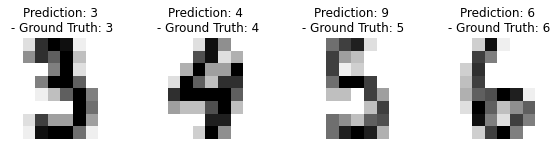

In [9]:
# Change the indices in images_and_predictions below to see more predictions
images_and_predictions = list(zip(digits.images[n_samples//2:], predicted))

plt.figure(1, figsize=(10, 4))
for index, (image, prediction) in enumerate(images_and_predictions[30:34]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap='gray_r', interpolation='nearest')  # color map gray reversed
    plt.title(f'Prediction: {prediction}\n - Ground Truth: {expected[index+30]}')

plt.show()

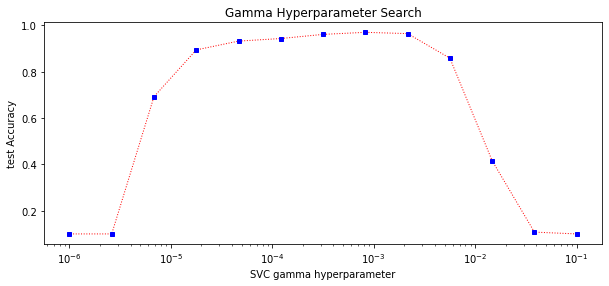

In [10]:
# Hyperparameter search
Gamma_param = np.logspace(-1, -6, num=13, dtype=float)

Classifiers = [svm.SVC(gamma=param) for param in Gamma_param]

training, training_labels = X[:n_samples//2], digits.target[:n_samples//2]
testing, testing_labels = X[n_samples//2:], digits.target[n_samples//2:]

for clf in Classifiers:
    clf.fit(training, training_labels)

predicteds = [clf.predict(testing) for clf in Classifiers]
accs = [metrics.accuracy_score(expected, _) for _ in predicteds]

_, axs = plt.subplots(figsize=(10, 4))
axs.plot(Gamma_param, accs, marker='s', mfc='b', mec='b', ms=4, c='r', ls=':', lw=1)
axs.set(xlabel='SVC gamma hyperparameter', ylabel='test Accuracy', title='Gamma Hyperparameter Search', xscale='log')
plt.show()

In [11]:
# pick a few classifiers and their hyperparameters from above
PLOTS_N = 5

Classifiers_pca = [Classifiers[1], Classifiers[2], Classifiers[5], Classifiers[8], Classifiers[10]]
Gamma_param_pca = [Gamma_param[1], Gamma_param[2], Gamma_param[5], Gamma_param[8], Gamma_param[10]]

M=2 (PCA), Model-0 (g=4e-02) Acc=0.616
M=2 (PCA), Model-1 (g=1e-02) Acc=0.620
M=2 (PCA), Model-2 (g=8e-04) Acc=0.620
M=2 (PCA), Model-3 (g=5e-05) Acc=0.528
M=2 (PCA), Model-4 (g=7e-06) Acc=0.352


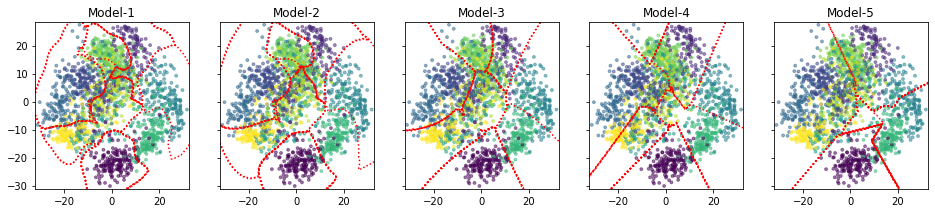

In [12]:
from sklearn.decomposition import PCA

# Visualize the models above in 2D
Xpca = PCA(n_components=2).fit_transform(X)

# train and test datasets and their labels
Xtr, ytr = Xpca[:Xpca.shape[0]//2], digits.target[:digits.target.shape[0]//2]
Xts, yts = Xpca[Xpca.shape[0]//2:], digits.target[digits.target.shape[0]//2:]

for clf in Classifiers_pca:
    clf.fit(Xtr, ytr)

ypreds = [clf.predict(Xts) for clf in Classifiers_pca]

for i, clf in enumerate(Classifiers_pca):
    acc = metrics.accuracy_score(yts, ypreds[i])
    print(f'M=2 (PCA), Model-{i} (g={Gamma_param_pca[i]:.0e}) Acc={acc:.3f}')

h = 0.3  # mesh granularity of the plot

def plot_decisionboundary(_ax, _X, _clf, _h, color_db='r'):  # _h = step size in the mesh
    def get_minmax(_X, _m):  # _m = margin for visuals
        return _X[:,0].min()-_m, _X[:,0].max()+_m, _X[:,1].min()-_m, _X[:,1].max()+_m
    x1_min, x1_max, x2_min, x2_max = get_minmax(_X, 1)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, _h), np.arange(x2_min, x2_max, _h))
    ypred = _clf.predict(np.c_[xx1.reshape(-1), xx2.reshape(-1)]).reshape(xx1.shape)
    _ax.contour(xx1, xx2, ypred, colors=color_db, linestyles='dotted')

_, axs = plt.subplots(nrows=1, ncols=PLOTS_N, figsize=(16, 3), sharey=True)
for i, clf in enumerate(Classifiers_pca):
    plt.subplot(1, PLOTS_N, i+1)
    axs[i].scatter(Xpca[:,0], Xpca[:,1], s=8, c=digits.target.tolist(), alpha=0.5)
    plot_decisionboundary(axs[i], Xpca, clf, h)
    axs[i].set_title(f'Model-{i+1}')

plt.show()